# Galaxy rotation curves
Here simulation of a few model universes are shown.

### Setting the general code parameters

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import AstronomyCalc

code_param_dict = {'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}

### Read dataset
We will use the publicly available [SPARC](http://astroweb.cwru.edu/SPARC/) Galaxy dataset.

In [2]:
data_dir = 'data/Rotmod_LTG/'
filename = data_dir+'/NGC2403_rotmod.dat'

In [31]:
reader = AstronomyCalc.SPARC_Galaxy_dataset()
data_NGC2403 = reader.read_rotation_curves(filename)
print(data_NGC2403['values'].keys())

dict_keys(['Rad', 'Vobs', 'errV', 'Vgas', 'Vdisk', 'Vbul', 'SBdisk', 'SBbul'])


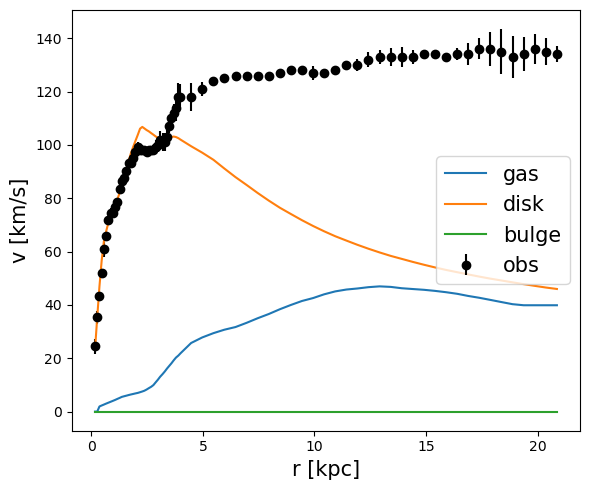

In [35]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.errorbar(data_NGC2403['values']['Rad'], data_NGC2403['values']['Vobs'], yerr=data_NGC2403['values']['errV'], label='obs',
           c='k', ls=' ', marker='o')
ax.plot(data_NGC2403['values']['Rad'], data_NGC2403['values']['Vgas'], label='gas',
           c='C0', ls='-')
ax.plot(data_NGC2403['values']['Rad'], data_NGC2403['values']['Vdisk'], label='disk',
           c='C1', ls='-')
ax.plot(data_NGC2403['values']['Rad'], data_NGC2403['values']['Vbul'], label='bulge',
           c='C2', ls='-')
ax.set_xlabel('r [{}]'.format(data_NGC2403['units']['Rad']), fontsize=15)
ax.set_ylabel('v [{}]'.format(data_NGC2403['units']['Vobs']), fontsize=15)
ax.legend(fontsize=15)
plt.tight_layout()
plt.show()

### Simple model
We can assume the galaxy to be a spherically symmetric system and find:
$v_\mathrm{rot}=\sqrt{\frac{GM(r)}{r}}$

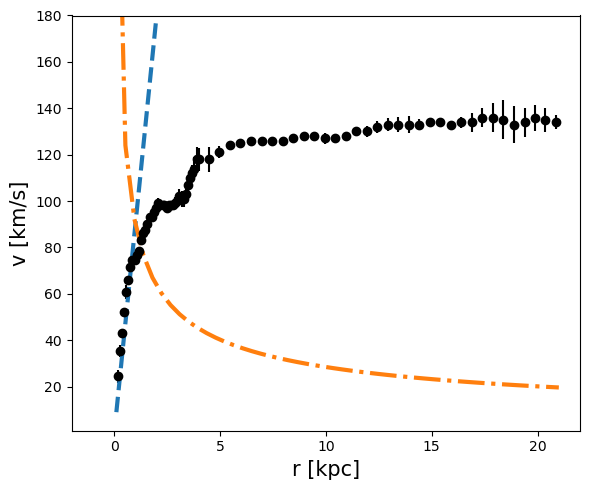

In [30]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.errorbar(data_NGC2403['values']['Rad'], data_NGC2403['values']['Vobs'], yerr=data_NGC2403['values']['errV'],
           c='k', ls=' ', marker='o')

rr = np.linspace(0.1,21)
const_rho = lambda r: 90*r
const_mas = lambda r: 90/np.sqrt(r)
ax.plot(rr, const_rho(rr), ls='--', lw=3, c='C0')
ax.plot(rr, const_mas(rr), ls='-.', lw=3, c='C1')
ax.set_xlabel('r [{}]'.format(data_NGC2403['units']['Rad']), fontsize=15)
ax.set_ylabel('v [{}]'.format(data_NGC2403['units']['Vobs']), fontsize=15)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.axis([-2,22,1,180])
plt.tight_layout()
plt.show()